# 케라스에서 모델을 만드는 API는 세 가지
* Sequential모델: 단순히 층을 쌓을 수만 있습니다.
* 함수형 API: 그래프 같은 모델구조, 사용성과 유연성 사이의 적절한 중간지점에 해당
* Model subclssing: 모든 것을 밑바닥부터 직접 만들 수 있는 저수준 방법, 상세한 내용을 완전히 제어하고 싶은 경우에 적합

## Sequential API

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])  

In [5]:
# 위와 같다.
model = keras.Sequential()
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [6]:
model.weights

ValueError: Weights for model sequential_1 have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.

In [8]:
model.build(input_shape=(None,3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.2529608 ,  0.25905037, -0.2986754 ,  0.03286684, -0.07407896,
         -0.01050818,  0.27185637,  0.09328178, -0.2798804 ,  0.13479897,
          0.02834463,  0.14330238, -0.02099669,  0.20221823, -0.06275883,
         -0.01592839,  0.1330457 , -0.27652657, -0.23763332,  0.2769478 ,
          0.273601  , -0.22983631, -0.20307462,  0.17600185, -0.03933242,
         -0.14033782, -0.08673514,  0.21838933, -0.26416308, -0.01474103,
          0.26678532, -0.04544476,  0.16788891,  0.00604305,  0.23135126,
          0.19127733, -0.11116986,  0.09517092, -0.08916181, -0.07347544,
          0.22755527,  0.1551798 ,  0.14357242,  0.19502792, -0.10841277,
          0.29816055,  0.1948193 ,  0.16767344, -0.274452  ,  0.20953828,
         -0.0593881 ,  0.27339727,  0.23970693,  0.28400123, -0.2449836 ,
         -0.12367371,  0.08600026, -0.14728329, -0.14819789,  0.03938201,
         -0.23094328,  0.22955644, -0.17005

In [9]:
# debugging을 위해 사용
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [10]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_first_layer (Dense)       (None, 64)                256       
_________________________________________________________________
my_last_layer (Dense)        (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모델의 입력크기를 미리 지정하기
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


## Functional API

* 다중 입력(eg:이미지,이미지 메타데이터), 다중출력 또는 비선형적 구조를 가진 모델 생성

In [17]:
inputs = keras.Input(shape=(3,), name="my_input") # symbolic tensor
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [21]:
inputs.shape

TensorShape([None, 3])

In [20]:
inputs.dtype

tf.float32

In [22]:
features.shape

TensorShape([None, 64])

In [23]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
my_input (InputLayer)        [(None, 3)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                650       
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


* 다중 입력, 다중 출력 함수형 모델

In [24]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [25]:
import numpy as np

num_samples = 1280

# dummy_input
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# dummy_output
priority_data = np.random.random(size=(num_samples, 1)) 
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

40/40 [==============================] - 1s 10ms/step - loss: 38.7622 - priority_loss: 0.3305 - department_loss: 38.4317 - priority_mean_absolute_error: 0.4954 - department_accuracy: 0.2414


In [26]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

40/40 [==============================] - 1s 9ms/step - loss: 67.3929 - priority_loss: 0.3305 - department_loss: 67.0623 - priority_mean_absolute_error: 0.4954 - department_accuracy: 0.2414


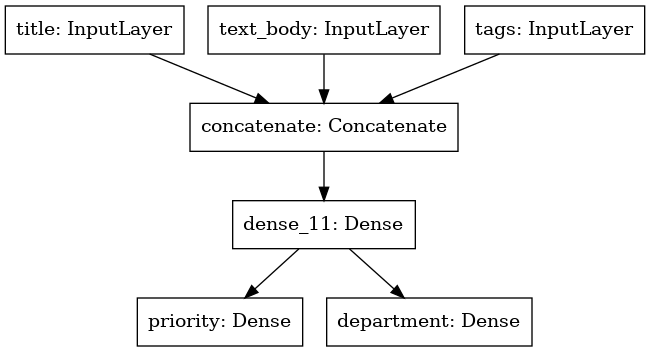

In [27]:
keras.utils.plot_model(model, "ticket_classifier.png")

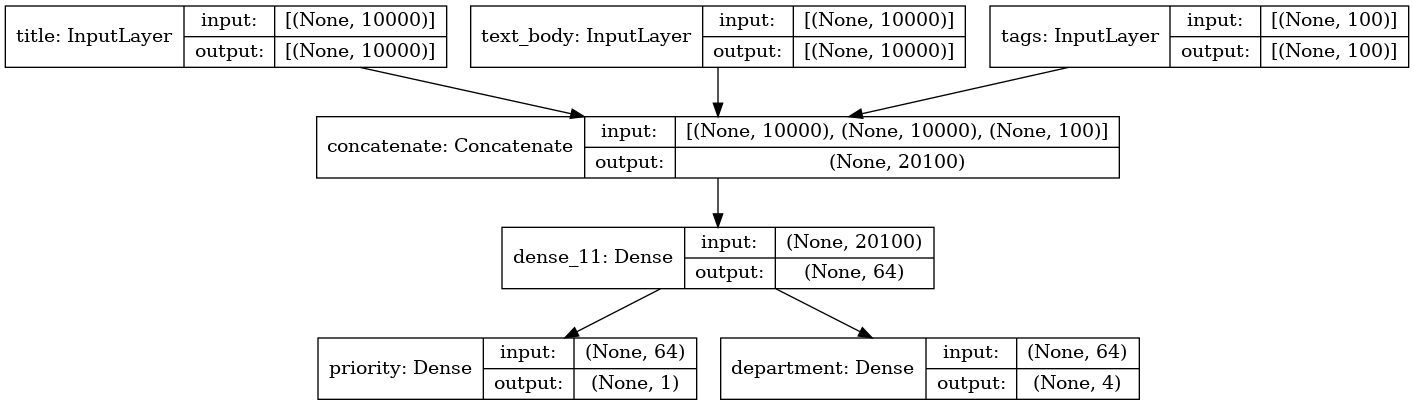

In [28]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

In [29]:
model.layers

In [39]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [31]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

In [41]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

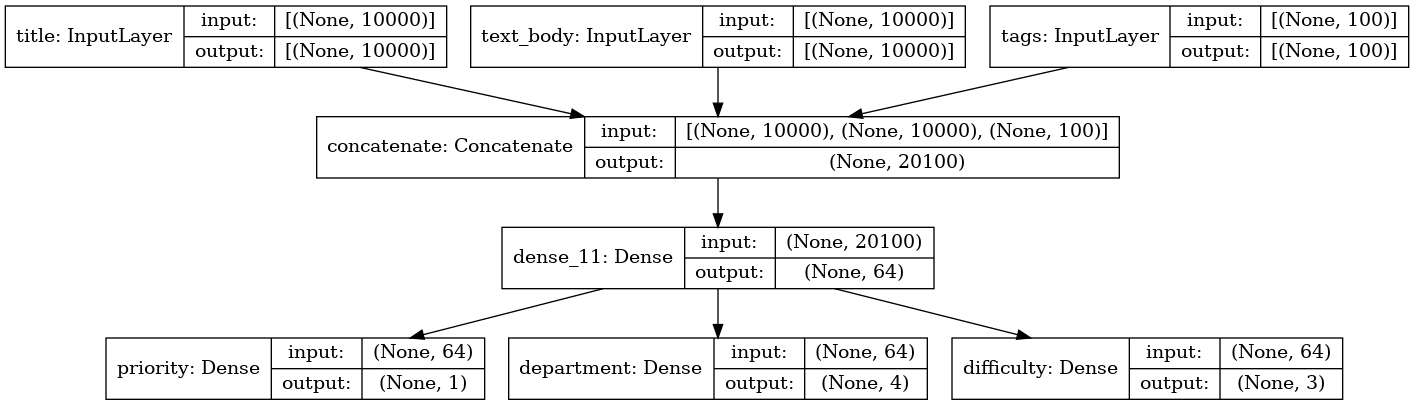

In [42]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

## Model subclassing

* __subclassing이 상속인가요??__
*  __init__() 메서드에서 모델이 사용할 층을 정의
* call() 메서드에서 앞서 만든 층을 사용하여 모델의 정방향 패스를 정의
* subclass의 객체를 만들고 데이터와 함께 호출하여 가중치를 만듭니다.

In [43]:
# 고객 이슈 티켓 관리 모델 재구현

class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()
        self.concat_layer = layers.Concatenate()
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")

    def call(self, inputs):
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

* keras.model 클래스에는 fit(), evaluate(), predict() 메서드가 내재됨
* keras.layer 클래스에는 ?

In [ ]:
# 객체 만들기
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

In [ ]:
# compile, fit, evaluate, predict
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          [priority_data, department_data],
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

* subclassing에서는 summary(), plot_model()가 안됨, 그래서 층 그래프 노드를 참조할 수 없음
* 생성 후 정방행 패스는 말 그대로 '블랙박스'

## 여러 방식을 혼합하여 사용하기

In [46]:
# subclassing포함하는 functional model
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features) # 여기서 사용
model = keras.Model(inputs=inputs, outputs=outputs)

In [47]:
# functional model을 포함하는 subclassing model
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier # 여기서 사용

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

# 내장된 훈련루프와 평가 루프 사용하기

In [46]:
# 이 workflow를 customizing 할 수 있는 방법을 배웁니다.
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)
predictions = model.predict(test_images)

Epoch 1/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2937 - accuracy: 0.9120 - val_loss: 0.1481 - val_accuracy: 0.9579
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1651 - accuracy: 0.9535 - val_loss: 0.1284 - val_accuracy: 0.9658
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0973 - accuracy: 0.9734


### 사용자 정의 지표 만들기

In [40]:
# Metric 클래스를 상속하여 사용자정의 지표
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric):

    def __init__(self, name="rmse", **kwargs):
        super().__init__(name=name, **kwargs)
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self):
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [41]:
# 사용
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()]) # 여기서 사용
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2983 - accuracy: 0.9126 - rmse: 7.1807 - val_loss: 0.1556 - val_accuracy: 0.9569 - val_rmse: 7.3657
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1650 - accuracy: 0.9532 - rmse: 7.3556 - val_loss: 0.1319 - val_accuracy: 0.9655 - val_rmse: 7.4000
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.1024 - accuracy: 0.9738 - rmse: 7.4322


### 콜백 사용하기
fit()메서드에 콜백을 전달하여 훈련되는 동안 특정시점에 수행될 행동을 예약합니다.

* 모델 checkpoint 저장: 어떤 지점에서 모델의 현재 가중치를 저장
* early stopping: 검증 손실이 더 이상 향상되지 않을 때 훈련을 중지 + 가장 좋은 모델을 저장
* 훈련하는 동안 hyperparameter값을 동적으로 조정: 학습률 등
* 훈련과 검증지표를 로그기록, 시각화: 진행표시줄도 콜백의 예

> e.g.) keras.callbacks.[ModelCheckpoint/EarlyStopping/LearningRateScheduler/ReduceLROnPlateau/CSVLogger] 등

In [47]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="val_accuracy",
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.h5",
        monitor="val_loss",
        save_best_only=True,
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=callbacks_list,
          validation_data=(val_images, val_labels))

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2952 - accuracy: 0.9141 - val_loss: 0.1387 - val_accuracy: 0.9595
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1651 - accuracy: 0.9545 - val_loss: 0.1181 - val_accuracy: 0.9669
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1399 - accuracy: 0.9634 - val_loss: 0.1100 - val_accuracy: 0.9707
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1244 - accuracy: 0.9685 - val_loss: 0.1125 - val_accuracy: 0.9712
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1183 - accuracy: 0.9706 - val_loss: 0.1028 - val_accuracy: 0.9752
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1083 - accuracy: 0.9738 - val_loss: 0.1202 - val_accuracy: 0.9735
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1039 - accuracy: 0.9748 - val_loss: 0.1068 - val_ac

In [48]:
model = keras.models.load_model("checkpoint_path.h5")

### 사용자 정의 콜백 만들기

on_epoch_begin(epoch, logs) # 각 에포크가 시작할 때 호출됩니다.  
on_epoch_end(epoch, logs) # 각 에포크가 끝날 때 호출됩니다.  
on_batch_begin(batch, logs) # 각 배치 처리가 시작하기 전에 호출됩니다.  
on_batch_end(batch, logs) # 각 배치 처리가 끝난 후에 호출됩니다.  
on_train_begin(batch, logs) # 훈련이 시작될 때 호출됩니다.  
on_train_end(batch, logs) # 훈련이 끝날 때 호출됩니다.

In [51]:
# Callback 클래스를 상속하여 사용자 정의 콜백
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2963 - accuracy: 0.9113 - val_loss: 0.1691 - val_accuracy: 0.9527
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1670 - accuracy: 0.9531 - val_loss: 0.1289 - val_accuracy: 0.9643
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1399 - accuracy: 0.9634 - val_loss: 0.1112 - val_accuracy: 0.9720
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1290 - accuracy: 0.9670 - val_loss: 0.1153 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1167 - accuracy: 0.9703 - val_loss: 0.1040 - val_accuracy: 0.9761
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1110 - accuracy: 0.9722 - val_loss: 0.1071 - val_accuracy: 0.9752
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1053 - accuracy: 0.9745 - val_loss: 0.1130 - val_ac

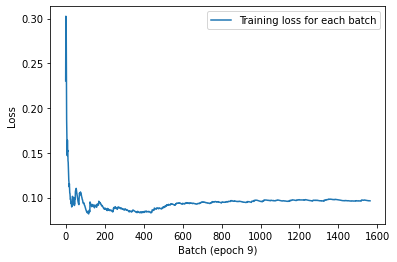

In [52]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

In [54]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="./tb_logs",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2937 - accuracy: 0.9131 - val_loss: 0.1521 - val_accuracy: 0.9575
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1646 - accuracy: 0.9547 - val_loss: 0.1437 - val_accuracy: 0.9597
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1394 - accuracy: 0.9629 - val_loss: 0.1121 - val_accuracy: 0.9720
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1266 - accuracy: 0.9671 - val_loss: 0.1173 - val_accuracy: 0.9730
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1166 - accuracy: 0.9717 - val_loss: 0.1108 - val_accuracy: 0.9749
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1124 - accuracy: 0.9727 - val_loss: 0.1116 - val_accuracy: 0.9749
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1010 - accuracy: 0.9758 - val_loss: 0.1123 - val_ac

In [55]:
%load_ext tensorboard
%tensorboard --logdir ./tb_logs

# 사용자 정의 훈련/평가 루프 만들기
 * 내장 fit() 워크플로는 지도학습에만 초점
 * 내장 fit()으로 충분하지 않은 상황이면 자신만의 훈련로직을 직접 작성해야 합니다.

* 훈련 v. 추론
    - dropout층과 같은 층은 훈련과 추론에서 동작이 다릅니다.(dropout은 추론에서는 안쓰인다..)
        - 정방향 패스에서 model(inputs, training=True)내 true
    - 역방향 패스에서 tape.gradients(loss, model.trainable_weights)내 model.trainable_weights
        - **훈련가능한 가중치**: 역전파로 업데이트//**훈련되지 않는 가중치**: 해당층의 정방향 패스동안 업데이트 eg) 배치처리카운팅 사용자정의층

In [ ]:
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradients(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(model.trainable_weights, gradients))

* 측정 지표의 저수준 사용법

In [48]:
# 각 배치의 타킷과 예측
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions) # 측정지표 API
# 현재 지표값
current_result = metric.result()
print(f"결과: {current_result:.2f}")

결과: 1.00


In [52]:
# 손실 평균 추적
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"평균 지표: {mean_tracker.result():.2f}")

평균 지표: 2.00


> (훈련 에포크나 평가를 시작할 때처럼) 현재 결과를 재설정하고 싶을 때 metric.reset_state() 사용

* 완전한 훈련과 평가 루프
     * 정방향 패스, 역방향 패스, 지표추적을 fit()과 유사한 훈련 스텝함수로 연결

In [70]:
# 단계별 훈련 루프: 훈련 스텝 함수
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# -앞 단원 참조 
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]
# -

model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()
optimizer = keras.optimizers.RMSprop()
metrics = [keras.metrics.SparseCategoricalAccuracy()]
loss_tracking_metric = keras.metrics.Mean()

def train_step(inputs, targets):
    with tf.GradientTape() as tape: # 정방향 패스
        predictions = model(inputs, training=True) 
        loss = loss_fn(targets, predictions)
    gradients = tape.gradient(loss, model.trainable_weights) # 역방향 패스
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs

11501568/11490434 [==============================] - 0s 0us/step


In [71]:
# 단계별 훈련 루프: 지표 재설정
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

In [72]:
# 단계별 훈련 루프: 자체
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"{epoch}번째 에포크 결과")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

0번째 에포크 결과
...sparse_categorical_accuracy: 0.9151
...loss: 0.2867
1번째 에포크 결과
...sparse_categorical_accuracy: 0.9541
...loss: 0.1632
2번째 에포크 결과
...sparse_categorical_accuracy: 0.9625
...loss: 0.1410


In [73]:
# 단계적 평가 루프
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9651
...val_loss: 0.1388


> 위에서 fit() 메서드와 evaluate() 메서드 구현,이후 핵심적인 최적화 내용이 이어짐

*  tf.function으로 성능 높이기

In [75]:
# 평가 스텝 함수에 @tf.function 데코레이터 추가
@tf.function
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("평가 결과:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

평가 결과:
...val_sparse_categorical_accuracy: 0.9651
...val_loss: 0.1388


> 디버깅 할 때는 데코레이터를 쓰지 말고 즉시 실행 모드를 사용
코드가 제대로 작동하고 성능을 높이고 싶을 때 훈련스텝과 평가스텝에 @tf.function 데코레이터를 추가

* fit()메서드를 사용자 정의 루프로 활용하기

* fit()메서드와 밑바닥부터 작성한 훈련 루프 사이의 중간점  
* 예를 들어 사용자 정의 훈련 스텝 함수를 제공하고 나머지 처리는 프레임워크에 위임  
    1. keras.model을 상속한 클래스를 생성  
    2. train_step(self,data) 메서드를 오버라이드  
    3. 모델의 Metric객체들을 반환하는 metrics속성을 구현(이를 통해 reset_state()메서드를 자동 호출)

In [78]:
# fit()이 사용할 사용자 정의 훈련 스텝 구현
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss")

class CustomModel(keras.Model):
    def train_step(self, data): # train_step 메서드를 오버라이딩
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True) # model(inputs, training=True)대신 self(inputs, training=True)사용
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        loss_tracker.update_state(loss)
        return {"loss": loss_tracker.result()}

    @property
    def metrics(self): # 에포크마다 재설정할 지표는 여기에 나열
        return [loss_tracker]

In [79]:
# 이제 사용자 정의 모델의 객체를 만들고, 컴파일하고,// 보통 때처럼 fit()
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop()) #손실은 모델 밖에서 이미 정의
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.2969
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1654
Epoch 3/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1384


> 프레임워크가 알아서 처리하기 때문에 부가적으로 train_step메서드를 오버라이딩할 때 @tf.function 데코레이터를 사용할 필요가 없다

In [80]:
# compile()메서드를 통해 지표와 손실을 설정하는 경우
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions) # self.compiled_loss
        gradients = tape.gradient(loss, self.trainable_weights) 
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions) # self.compiled.metrics
        return {m.name: m.result() for m in self.metrics} # self.metrics

In [81]:
# 잘 작동하나 보자!
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1563/1563 [==============================] - 12s 7ms/step - loss: 0.2952 - sparse_categorical_accuracy: 0.9122
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1648 - sparse_categorical_accuracy: 0.9535
Epoch 3/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1416 - sparse_categorical_accuracy: 0.9618


# 회고

* 실험환경이 각각 달라 이해의 어려움이 있었고, 기본 지식의 차이가 있는 점에서 개인적 부족함을 느꼈다.
* dense layer가 늘어나면 결과가 오히려 악화되는 이유를 교육과정 중에 확인해야 겠다.